Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection and Processing

In [3]:
#loading the csv data into a dataframe
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [4]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


So we can see that we have a dataset spanning over a decade(10 years)

In [6]:
#checking the number of rows and columns
gold_data.shape

(2290, 6)

In [7]:
#checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

So we can see that there are no missing values in our data

In [8]:
#stats related to our data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


While working on a regression project, we always need to find out the correlation in our dataset.

There are basically two types of correlation:
1. Positive Correlation
2. Negative Correlation

In [9]:
correlation = gold_data.corr()

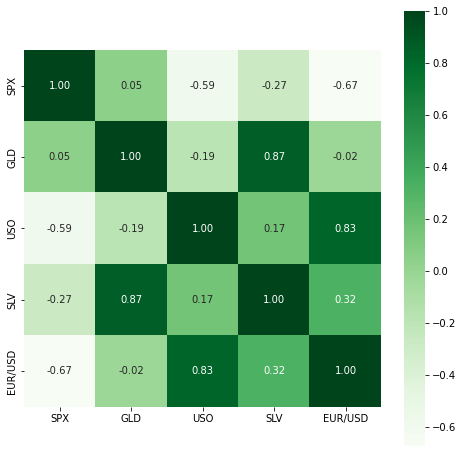

In [14]:
#constructing a heatmap to understand the correlation of our data
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':10}, cmap='Greens')
plt.show()

In [15]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


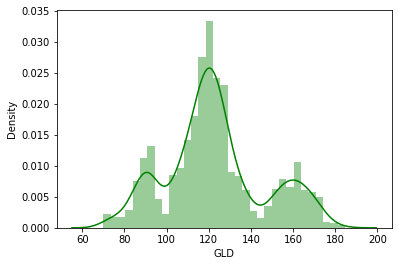

In [18]:
#checking the distribution values of GLD
sns.distplot(gold_data['GLD'], color='green')

Splitting the Features and Target in our dataset

In [20]:
X = gold_data.drop(['Date','GLD'], axis=1)
Y = gold_data['GLD']
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [21]:
#splitting into Training data & Test data
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

Model Training with Random Forest Regressor

In [22]:
regressor = RandomForestRegressor(n_estimators=100)

In [24]:
#training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Evaluating our model

In [25]:
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[168.62739946  82.13219985 116.00339998 127.70780073 120.4712012
 154.57979749 150.61829946 126.15470028 117.58949868 126.04600072
 116.6448011  171.76630031 141.43339879 168.03209852 115.08020055
 117.57460053 138.17420337 170.57690174 159.60230295 161.26239935
 155.21240061 125.29860034 175.88869944 156.72230348 125.12360058
  93.87470016  77.52729994 120.52500019 119.09309958 167.4887993
  88.09620048 125.22730025  91.24680046 117.68080007 121.04409908
 136.19910115 115.58310156 115.44710093 148.2989     107.13830079
 104.3631023   87.18919808 126.69040049 117.5921998  153.36679873
 119.58809977 108.31869981 108.14439805  93.30610075 127.20909748
  75.0752     113.57339861 121.37280005 111.15719918 118.84519881
 120.59329934 158.84789957 167.78050123 147.24049696  85.57649836
  94.32860034  86.78439873  90.4829002  118.97420066 126.47130047
 127.45879994 169.93080014 122.33739929 117.42099885  99.0228003
 168.53350127 143.4176983  131.78360199 121.2513024  121.08009934
 119.76930039

In [27]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error: ", error_score)

R squared Error:  0.9898294157429591


Comparing the Actual Price and Predicted Price

In [28]:
#converting the Y_test values from Pandas series to a List
Y_test = list(Y_test)

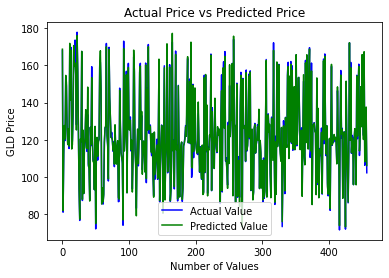

In [33]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.title('Actual Price vs Predicted Price')
plt.legend()
plt.show()

So, from the above plotting we can see that both the actual and predicted values are very close to each other because of their small error score. Hence, we can conclude that we were able to successfully predict the price of Gold using the Random Forest Regressor model.